# Homework 3.2: Clustering Shakespeare Plays
Dartmouth College, LING48, Spring 2023<br>
Kevin King (kevin.m.king.24@dartmouth.edu)

You can base your code off of:<br>
https://pythonprogramminglanguage.com/kmeans-text-clustering/

In the program below, we are clustering Shakespeare plays by performing the following steps:
1) First, I calculated the tf-idf matrix for the plays and their tokens using the `TfidfVectorizer` in `SciKit-Learn`.
2) Second, I used the `KMeans` function to cluster the plays based on lexical similarity and use ten clusters. I printed out the plays and their respective clusters as well as the top terms of each cluster. 
3) Third, I used the model to predict which cluster the two new documents would fall into using the `transform` function from the `TfidfVectorizer` object and the `predict` function from the `KMeans` object. 
4) Lastly, I referenced the Indo-European clustering example and made the necessary changes to make a hierarchical clustering dendrogram of the plays. 

In [19]:
import gdown
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

#### Download Shakespeare text and play names

In [20]:
# Download Shakespeare files
url = "https://drive.google.com/uc?id=1ulLPpoNEXBhyb8f2CGwEf2sslWBon-y9"
gdown.download(url, 'shakespeare.txt', quiet=False)
url = "https://drive.google.com/uc?id=1WEoyZG6EB1_jVynGu7mSZxHtUltxZLB7"
gdown.download(url, 'shakespearePlayTitles.txt', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1ulLPpoNEXBhyb8f2CGwEf2sslWBon-y9
To: /Users/kevin/Desktop/Dartmouth/2022-23/23S/CS72/HW3/shakespeare.txt
100%|██████████████████████████████████████| 5.63M/5.63M [00:00<00:00, 14.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1WEoyZG6EB1_jVynGu7mSZxHtUltxZLB7
To: /Users/kevin/Desktop/Dartmouth/2022-23/23S/CS72/HW3/shakespearePlayTitles.txt
100%|██████████████████████████████████████████| 569/569 [00:00<00:00, 1.91MB/s]


'shakespearePlayTitles.txt'

#### Read files and split the lines

In [21]:
titles = 'shakespearePlayTitles.txt'
allText = 'shakespeare.txt'
textBoundary = '<<NEWTEXTSTARTSHERE>>'

playTitles = open(titles, "r", encoding="utf8").read()
playTitles = playTitles.split("\n")

playScripts = open(allText, "r", encoding="utf8").read()
playScripts = playScripts.split(textBoundary)

#### Calculate tf-idf matrix for plays and tokens

In [22]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(playScripts)

#### K-Means Clustering 

In [54]:
# k-means model 
model = KMeans(n_clusters=10, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

# prints out the play titles and their associated clusters
for i, title in enumerate(playTitles):
    print(title, model.labels_[i])

AllsWellThatEndsWell 2
AntonyCleopatra 3
AsYouLikeIt 1
ComedyErrors 1
Coriolanus 1
Cymbeline 1
Hamlet 5
KingHenry4.1 4
KingHenry4.2 4
KingHenry5 2
KingHenry6.1 2
KingHenry6.2 2
KingHenry6.3 2
KingHenry8 2
KingJohn 2
JuliusCaesar 3
KingLear 2
LovesLabourLost 1
MacBeth 8
MeasureForMeasure 2
MerchantVenice 0
WivesWindsor 4
MidsummerNightsDream 1
MuchAdo 6
Othello 1
Pericles 9
KingRichard2 2
KingRichard3 2
RomeoJuliet 1
TamingShrew 1
Tempest 1
Timon 1
TitusAndronicus 1
TroilusCressida 1
12Night 7
GentlemenVerona 1
NobleKinsmen 1
WintersTale 1
LoversComplaint 1
PassionatePilgrim 1
PhoenixTurtle 1
VenusAdonis 1


In [55]:
# printing out the top terms per cluster
# reference: https://pythonprogramminglanguage.com/kmeans-text-clustering/
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 portia
 bassanio
 shylock
 launcelot
 lorenzo
 antonio
 gratiano
 nerissa
 jessica
 salerio
Cluster 1:
 thou
 love
 thy
 thee
 shall
 did
 good
 like
 sir
 timon
Cluster 2:
 king
 thou
 gloucester
 thy
 lord
 henry
 shall
 york
 richard
 duke
Cluster 3:
 antony
 caesar
 brutus
 cassius
 cleopatra
 enobarbus
 charmian
 casca
 thou
 shall
Cluster 4:
 falstaff
 ford
 bardolph
 prince
 page
 thou
 hotspur
 mrs
 sir
 poins
Cluster 5:
 hamlet
 horatio
 polonius
 laertes
 ophelia
 rosencrantz
 guildenstern
 lord
 king
 marcellus
Cluster 6:
 benedick
 leonato
 beatrice
 pedro
 claudio
 don
 hero
 dogberry
 borachio
 margaret
Cluster 7:
 toby
 olivia
 viola
 malvolio
 sir
 aguecheek
 fabian
 maria
 clown
 sebastian
Cluster 8:
 macbeth
 macduff
 banquo
 malcolm
 ross
 duncan
 lennox
 murtherer
 thane
 lady
Cluster 9:
 pericles
 marina
 simonides
 helicanus
 thaisa
 boult
 lysimachus
 cleon
 cerimon
 fisherman


#### Predict New Document Clusters

In [57]:
print("Predictions")
doc1 = vectorizer.transform(["battle and king"])
doc2 = vectorizer.transform(["wit and love"])
print("Doc1 cluster:", model.predict(doc1))
print("Doc2 cluster:", model.predict(doc2))

Predictions
Doc1 cluster: [2]
Doc2 cluster: [1]


#### Hierarchical Clustering Dendrogram

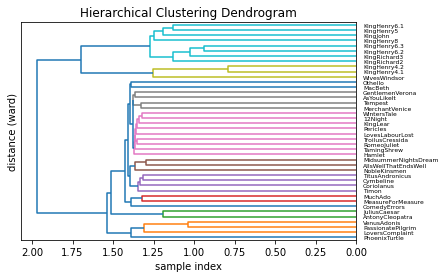

In [58]:
# referenced the Indo-European clustering example for this part

from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# applying todense() method and the 'ward' method in the linkage
Y = linkage(X.todense(), 'ward')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance (ward)')

dendrogram(Y, labels=playTitles, orientation="left", truncate_mode='level', leaf_rotation=0, leaf_font_size=6)
plt.savefig('dendrogram.pdf')